In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df =pd.read_csv('C:/Users/Deepak/OneDrive/Desktop/Fast Lane/Project-03/diabetes.csv')


In [3]:
print(df.head())
print(df.describe())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

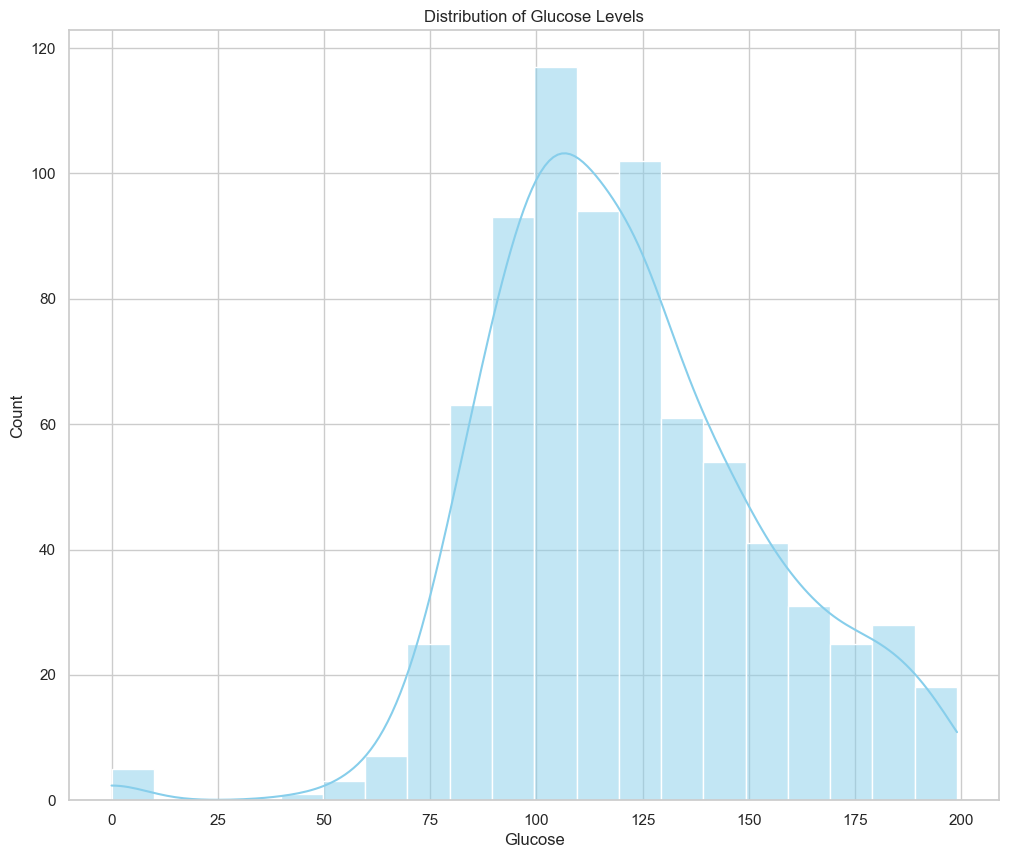

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Example of creating a histogram for the 'Glucose' feature
sns.histplot(df['Glucose'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Glucose Levels')
plt.show()


In [5]:
#Get the total number of missing data.
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


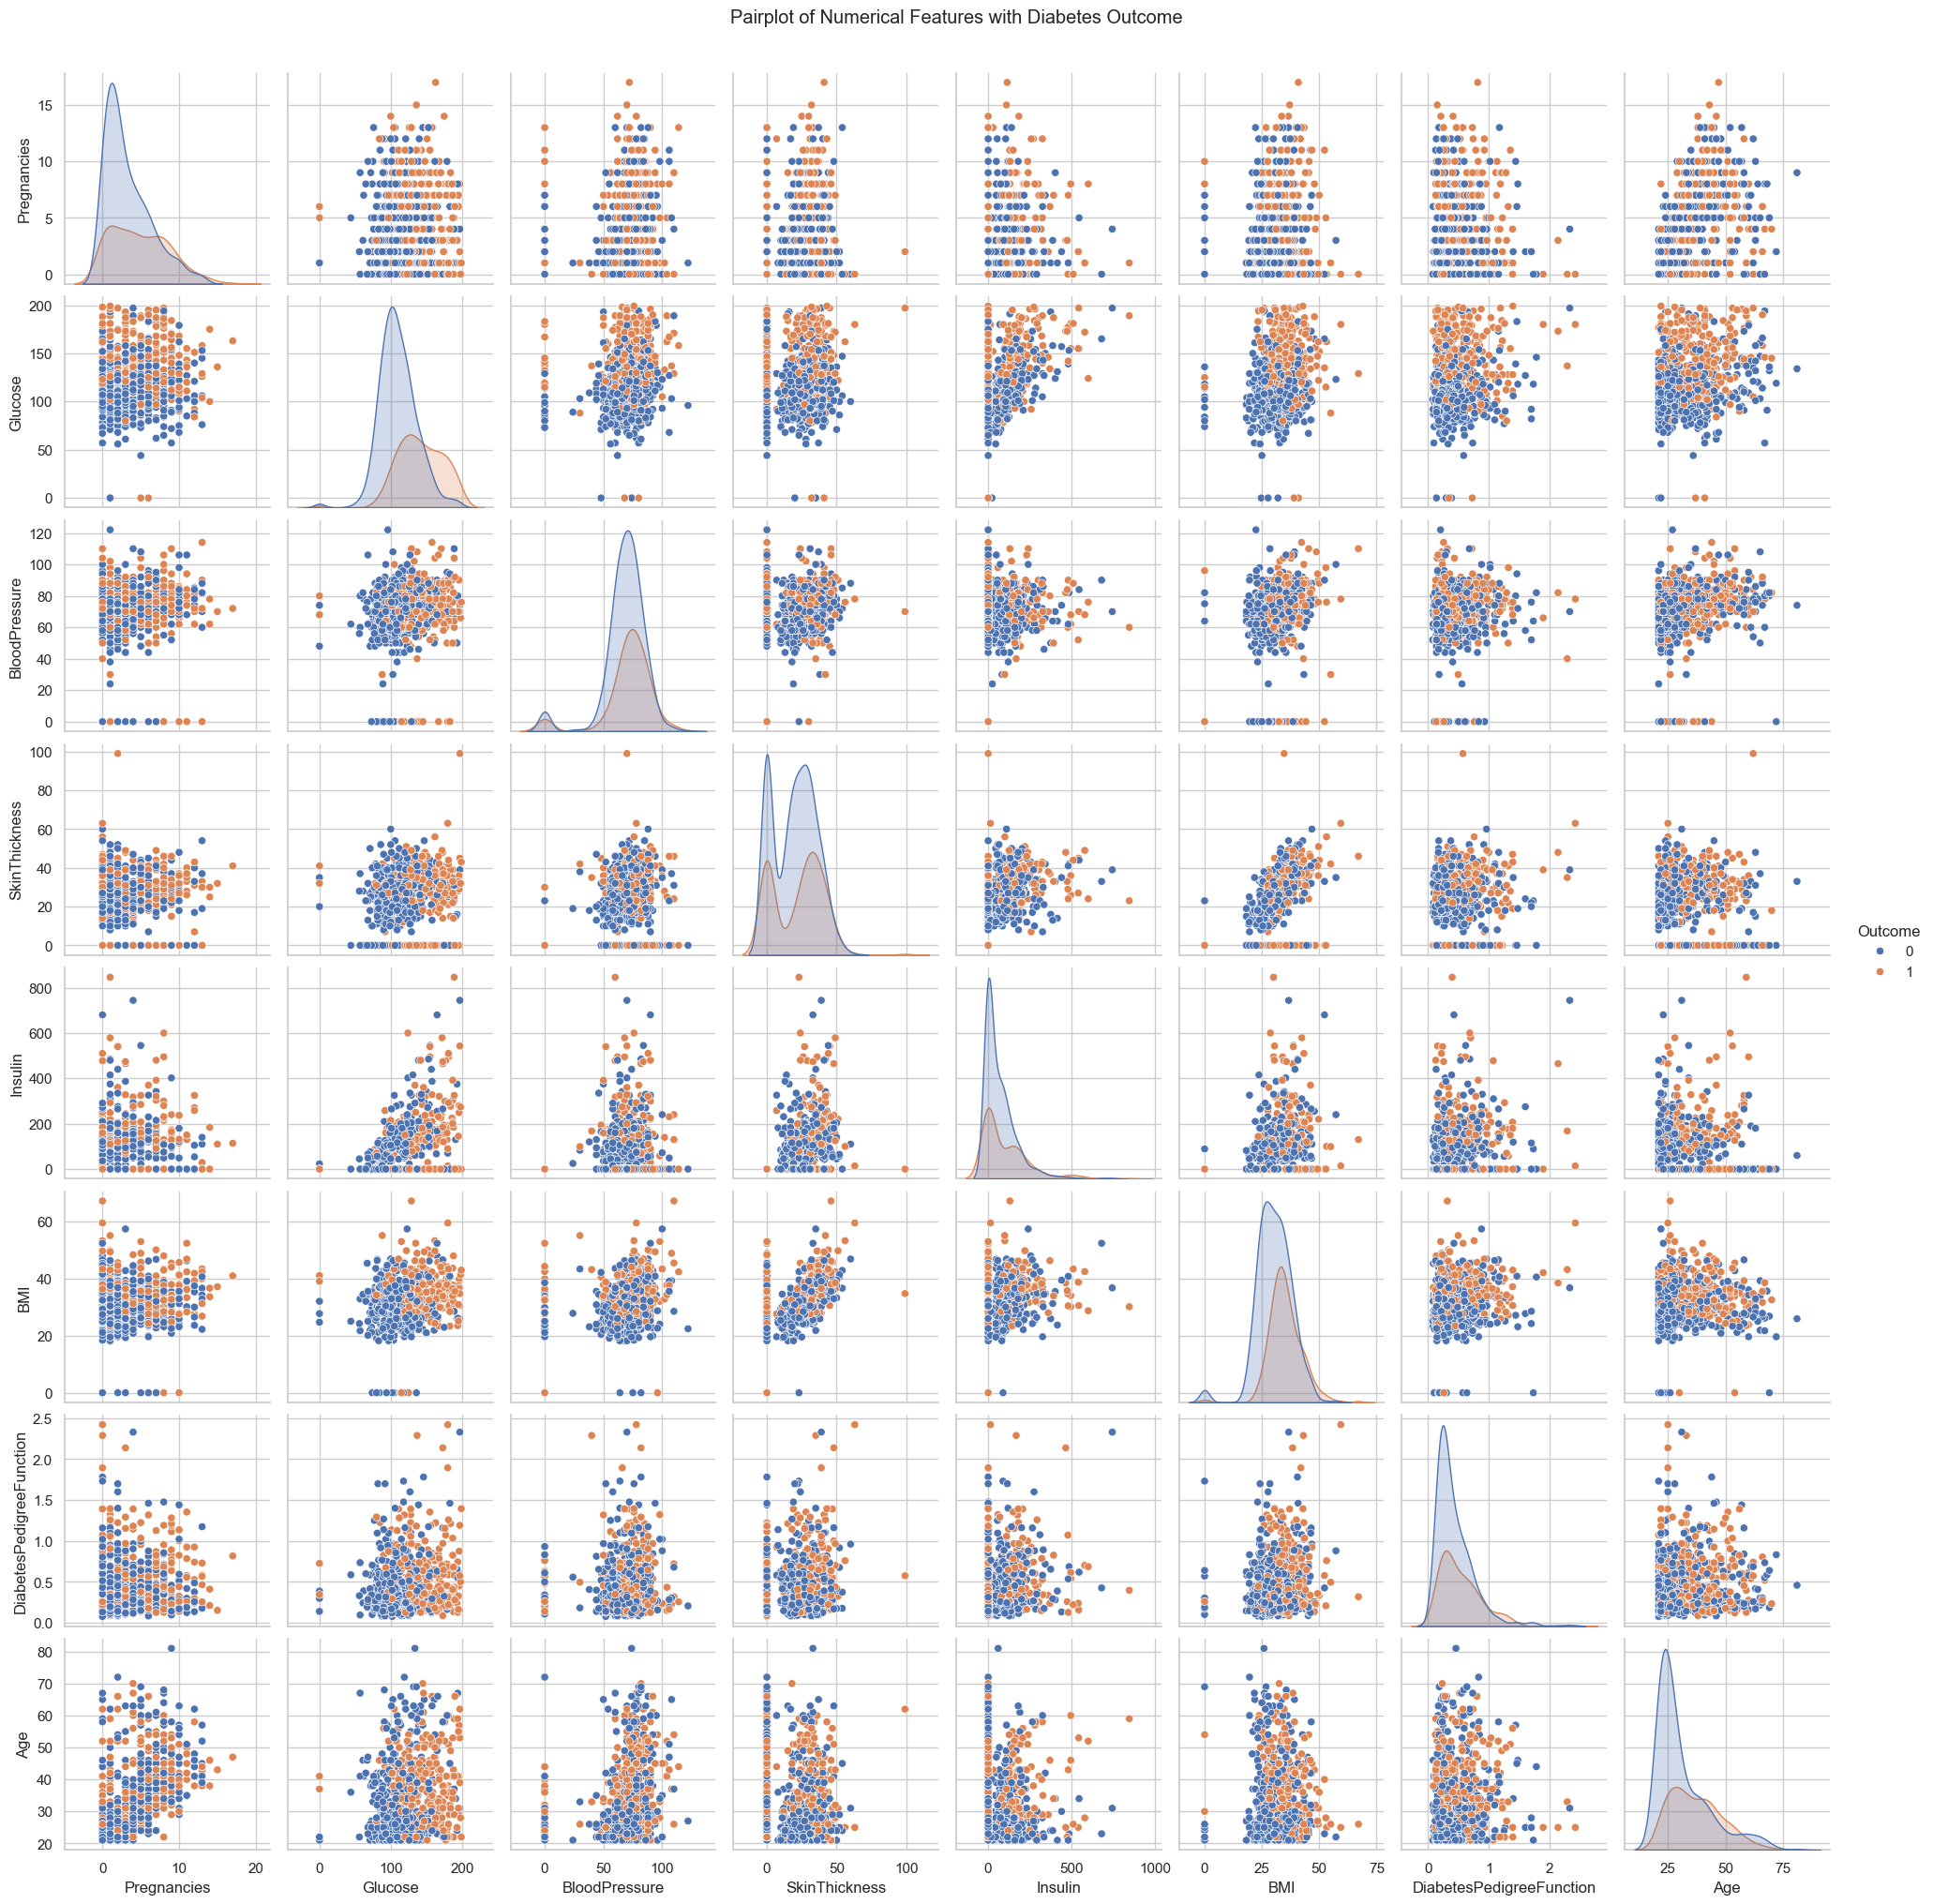

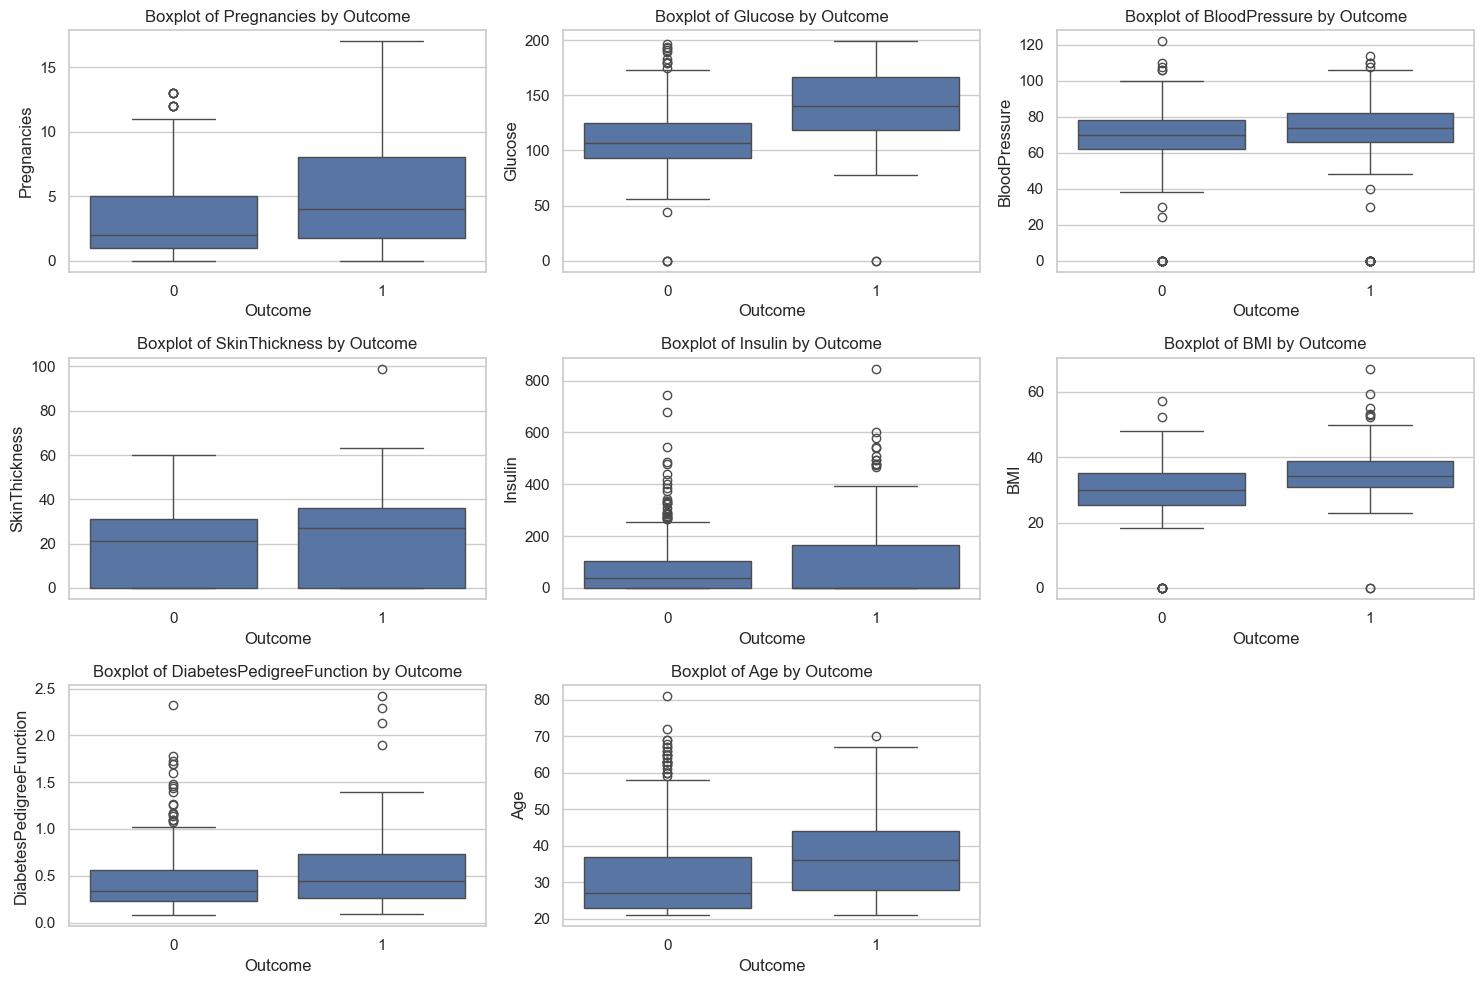

In [6]:


# Pairplot to visualize relationships between numerical features
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features with Diabetes Outcome", y=1.02)
plt.show()

# Boxplots to compare feature distributions for each outcome
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'Boxplot of {column} by Outcome')
plt.tight_layout()
plt.show()


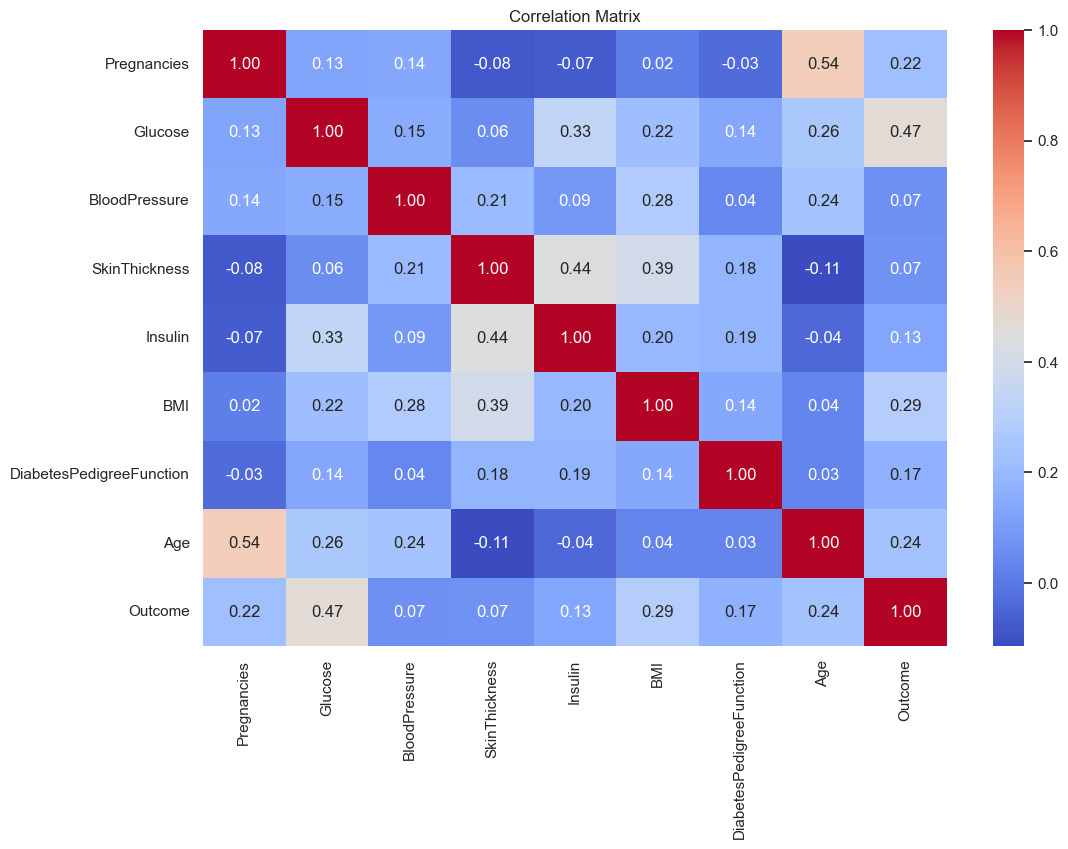

In [7]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [8]:
# Correlation with the target variable
correlation_with_target = df.corr()['Outcome'].abs().sort_values(ascending=False)
print(correlation_with_target)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance from the model
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

Glucose                     0.258864
BMI                         0.169984
Age                         0.140931
DiabetesPedigreeFunction    0.123768
BloodPressure               0.088134
Pregnancies                 0.076551
Insulin                     0.076122
SkinThickness               0.065646
dtype: float64


The feature importance scores obtained from the Random Forest model indicate that 'Glucose' exhibits the highest importance among the features, suggesting a strong association between variations in glucose levels and changes in the diabetes outcome, according to the model. Additionally, 'BMI' and 'Age' are identified as significant contributors to the model's predictions.